In [259]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon,bartlett
from statsmodels.stats.power import ttest_power
from sklearn import preprocessing
%matplotlib inline

In [154]:
iris = pd.read_csv('C:\\Users\\sande\\Desktop\\h20\\AIML\\Residency-2\\Lab_internal\\iris.csv')

In [155]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
132,133,6.4,2.8,5.6,2.2,Iris-virginica
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [156]:
iris.isnull().values.any()

True

In [157]:
# Treating missing values
# We are grouping by Species and replacing the missing value with the mean of the group-by
d=iris.groupby(by='Species').mean()
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.00600,3.418,1.464,0.244000
Iris-versicolor,75.5,5.93600,2.770,4.260,1.326000
Iris-virginica,126.5,6.57451,2.974,5.552,2.021569


In [158]:
iris['SepalLengthCm'].fillna(d['SepalLengthCm']['Iris-virginica'], inplace=True)
iris['SepalWidthCm'].fillna(d['SepalWidthCm']['Iris-virginica'], inplace=True)
iris['PetalLengthCm'].fillna(d['PetalLengthCm']['Iris-virginica'], inplace=True)
iris['PetalWidthCm'].fillna(d['PetalWidthCm']['Iris-virginica'], inplace=True)

In [159]:
# Checking for missing values
iris.isnull().values.any()

False

In [160]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [161]:
# Using LabelEncoder and fitting it to [0,1,2]
le = preprocessing.LabelEncoder()
le.fit([0,1,2])

LabelEncoder()

In [162]:
# The classes_ attribute gives the classes in the Label Encoder
le.classes_

array([0, 1, 2])

In [163]:
# We now can transform the Labels in Species column in to numeric(0,1,2)
iris['Species']=le.fit_transform(iris['Species'].astype('str'))
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.10000,3.000,5.900,2.1,2
145,146,6.70000,3.000,5.200,2.3,2
151,152,6.57451,2.974,5.552,1.8,2
83,84,6.00000,2.700,5.100,1.6,1
98,99,5.10000,2.500,3.000,1.1,1
108,109,6.70000,2.500,5.800,1.8,2
117,118,7.70000,3.800,6.700,2.2,2
1,2,4.90000,3.000,1.400,0.2,0
10,11,5.40000,3.700,1.500,0.2,0
87,88,6.30000,2.300,4.400,1.3,1


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [164]:
# We can observe that SepalWidthCm & Species are negatively correlated
# Although as there are no independent variables that are weakly correlated hence we donot drop any varibles from features.
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.711589,-0.394007,0.882453,0.897943,0.942753
SepalLengthCm,0.711589,1.000000,-0.110219,0.869942,0.816091,0.780532
SepalWidthCm,-0.394007,-0.110219,1.000000,-0.420041,-0.356643,-0.418227
PetalLengthCm,0.882453,0.869942,-0.420041,1.000000,0.963041,0.949612
PetalWidthCm,0.897943,0.816091,-0.356643,0.963041,1.000000,0.956469
Species,0.942753,0.780532,-0.418227,0.949612,0.956469,1.000000


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [165]:
iris['SepalLengthCm'].var()

0.6801462247943625

In [166]:
iris['SepalWidthCm'].var()

0.1855975601254795

In [167]:
iris['PetalLengthCm'].var()

3.1139813872429456

In [168]:
iris['PetalWidthCm'].var()

0.5814911106461051

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

In [169]:
import seaborn as sns
# Lets drop the Id column in the dataframe
iris.drop(columns=['Id'],inplace=True)

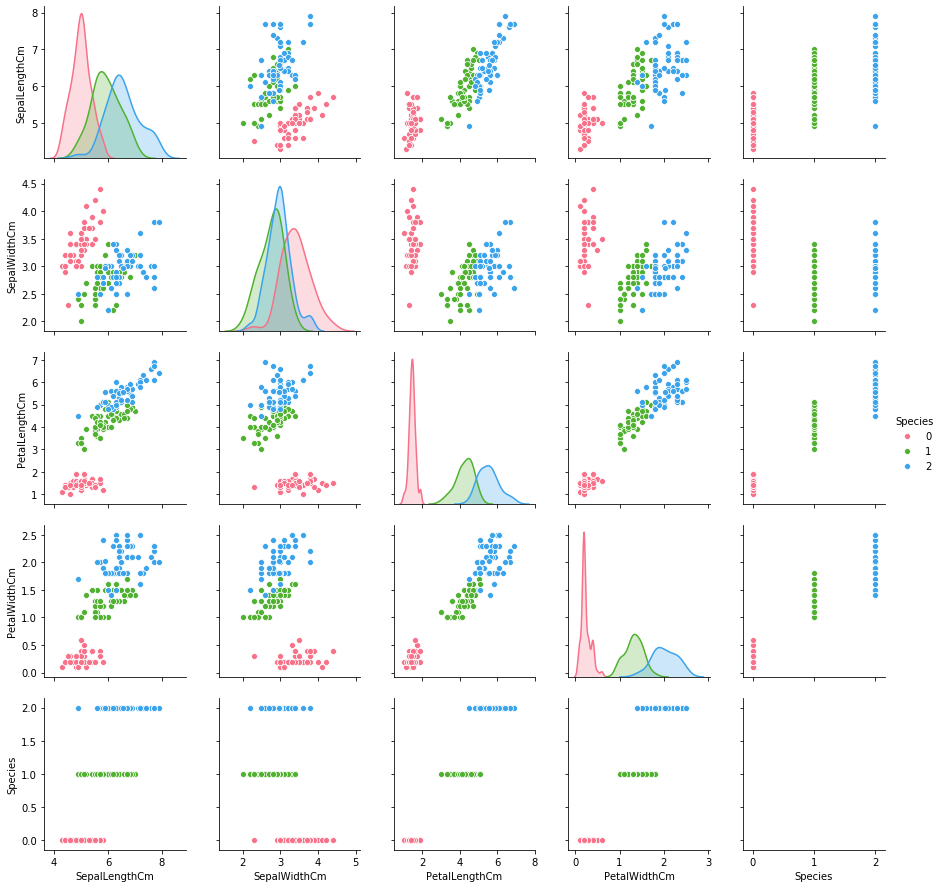

In [171]:
sns.pairplot(iris, hue="Species", palette="husl")

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [225]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris['Species'], test_size=0.20, random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [233]:
# K=3

In [230]:
# Model with Accuracy k=3
N3= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
#Calling K Nearest Neighbours
N3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [239]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels_3 = N3.predict(X_test)
N3.score(X_test, y_test)

1.0

In [240]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels_3))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [241]:
print(metrics.accuracy_score(y_test, predicted_labels_3))

1.0


In [258]:
# Classification Report of K=3
print(metrics.classification_report(y_test,predicted_labels_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [234]:
#K=5

In [243]:
# Model with Accuracy 5
N5= KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
#Calling K Nearest Neighbours
N5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [244]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels_5 = N5.predict(X_test)
N5.score(X_test, y_test)

1.0

In [245]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels_5))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [246]:
print(metrics.accuracy_score(y_test, predicted_labels_5))

1.0


In [256]:
# Classification Report of K=5
print(metrics.classification_report(y_test,predicted_labels_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [236]:
# k=9

In [249]:
# Model with Accuracy k=9
N9= KNeighborsClassifier(n_neighbors= 9, weights = 'distance' )
#Calling K Nearest Neighbours
N9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [250]:
# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels_9 = N9.predict(X_test)
N9.score(X_test, y_test)

1.0

In [251]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels_9))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [253]:
print(metrics.accuracy_score(y_test, predicted_labels_9))

1.0


In [257]:
# Classification Report of K=9
print(metrics.classification_report(y_test,predicted_labels_9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [278]:
mis=[0]*10
j=0
for i in range(1,21,2):
    N= KNeighborsClassifier(n_neighbors= i, weights = 'distance' )
    N.fit(X_train, y_train)
    predicted_labels = N.predict(X_test)
    N.score(X_test, y_test)
    mis[j]=1-metrics.accuracy_score(y_test, predicted_labels)
    print("For k value {}, the Misclassification error is {}".format(i,mis[j]))
    j+=1
    
    
    
    

For k value 1, the Misclassification error is 0.032258064516129004
For k value 3, the Misclassification error is 0.0
For k value 5, the Misclassification error is 0.0
For k value 7, the Misclassification error is 0.032258064516129004
For k value 9, the Misclassification error is 0.0
For k value 11, the Misclassification error is 0.0
For k value 13, the Misclassification error is 0.0
For k value 15, the Misclassification error is 0.0
For k value 17, the Misclassification error is 0.0
For k value 19, the Misclassification error is 0.0


## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

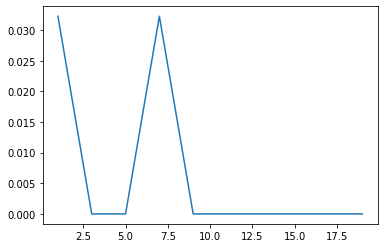

In [279]:
from matplotlib import pyplot
k=list([1,3,5,7,9,11,13,15,17,19])
pyplot.plot(k,mis)

In [270]:
mis

[0.967741935483871,
 1.0,
 1.0,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0]